In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.linear_model import Lasso


In [4]:
# grab data -- change path for your own file
df1 = pd.read_csv("C:/Users/karuthers/Dropbox/ML_teaching/classes/train_ml1.csv") 

# print first few rows -- could also use df.head()
print (df1.iloc[:3])
# and get summary stats on variables
print (df1.describe())

           x1         x2         x3  x4   x5  train           y
0  -99.551155 -133.21863 -1198.5691   0  0.0      1  3380.71610
1 -180.243940 -147.40544 -1450.6776   0  0.0      1  4018.73290
2  122.136280 -107.45643   283.7869   0  0.0      1  -613.12384
                x1          x2           x3          x4          x5  \
count   277.000000  277.000000   277.000000  277.000000  277.000000   
mean    -27.100527  -19.139597   104.186919    0.357401  -20.794985   
std     609.832620  102.445197  1028.155514    0.480102   39.701123   
min   -9999.000000 -286.343050 -2838.069300    0.000000 -188.637150   
25%     -61.044746  -86.558517  -551.823850    0.000000  -36.172554   
50%       7.100893  -12.620237   102.547520    0.000000    0.000000   
75%      82.980598   47.833904   804.191410    1.000000    0.000000   
max     263.999080  272.811490  2940.537800    1.000000   52.763409   

            train            y  
count  277.000000   277.000000  
mean     0.996390  -252.757851  
std  

In [5]:
# drop missing values -- but beware that you don't drop too many rows or drop rows that are of a 'type'!  So check the count of each.
df2 = df1.dropna()
# and get summary stats on variables to check to see if any variables had missingness
print (df2.describe())

                x1          x2           x3          x4          x5  \
count   277.000000  277.000000   277.000000  277.000000  277.000000   
mean    -27.100527  -19.139597   104.186919    0.357401  -20.794985   
std     609.832620  102.445197  1028.155514    0.480102   39.701123   
min   -9999.000000 -286.343050 -2838.069300    0.000000 -188.637150   
25%     -61.044746  -86.558517  -551.823850    0.000000  -36.172554   
50%       7.100893  -12.620237   102.547520    0.000000    0.000000   
75%      82.980598   47.833904   804.191410    1.000000    0.000000   
max     263.999080  272.811490  2940.537800    1.000000   52.763409   

            train            y  
count  277.000000   277.000000  
mean     0.996390  -252.757851  
std      0.060084  2798.905854  
min      0.000000 -8847.743200  
25%      1.000000 -2044.081100  
50%      1.000000  -256.244750  
75%      1.000000  1511.171500  
max      1.000000  8463.665000  


In [9]:
# create set of variables to pass to PCA, x's only / exclude Y
vars = ['x1', 'x2', 'x3', 'x4', 'x5', 'train']
x = df2.loc[:, vars].values

# also create Y while we're at it for use later on in regressions
y = df2.loc[:, 'y'].values

In [8]:
# normalize x -- very useful for some algorithms. 
# x_norm = StandardScaler().fit_transform(x)

array([[ -0.11901915,  -1.11557705,  -1.26937407,  -0.74577461,
          0.52473638],
       [ -0.2515782 ,  -1.25430964,  -1.51502252,  -0.74577461,
          0.52473638],
       [  0.24516058,  -0.8636489 ,   0.17499789,  -0.74577461,
          0.52473638],
       ...,
       [ -0.07541315,   0.22108256,   0.39206374,   1.34088769,
          0.52473638],
       [-16.38145919,  -1.15449164,   1.43760471,  -0.74577461,
          0.52473638],
       [  0.02166346,  -1.45038384,   0.22660137,  -0.74577461,
          0.52473638]])

In [10]:
IVs = ['x1', 'x2', 'x3', 'x4', 'x5', 'train']

# create train / test split using dataframe
x_train, x_test, y_train, y_test = train_test_split(df2.loc[:, IVs], df2.loc[:, 'y'], test_size=0.25, random_state=13)

# make sure results make sense
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)


(207, 6) (207,)
(70, 6) (70,)


In [11]:
# try both linear and polynomial of different degrees
linear_model = LinearRegression(normalize=True)
p2_model = LinearRegression(normalize=True)
p3_model = LinearRegression(normalize=True)

# create polynomial features
p2_features = PolynomialFeatures(degree=2)
p2_train = p2_features.fit_transform(x_train)
p2_test = p2_features.fit_transform(x_test)

p3_features = PolynomialFeatures(degree=3)
p3_train = p3_features.fit_transform(x_train)
p3_test = p3_features.fit_transform(x_test)

# now do estimation of models
lin_1 = linear_model.fit(x_train, y_train)
p2_1 = p2_model.fit(p2_train, y_train)
p3_1 = p3_model.fit(p3_train, y_train)


d:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardSca

In [12]:
print(lin_1.coef_)

print(p2_1.coef_)
print(p2_1.intercept_)
p2_features.get_feature_names()

[ 2.26543993e-01  2.14106972e+00 -1.60168075e+00  5.35842002e+02
  9.24458847e+00  1.31214703e+03]
[-1.40006619e-11  9.99015941e-01 -1.76552722e-02 -1.49975711e+00
 -3.89215988e+00  2.53538762e+00  6.41935701e+02  1.94349440e-04
 -3.57084744e-06 -2.64120310e-05 -3.13905461e-02 -5.59735817e-04
  9.99298554e-01  1.51341545e-04 -2.36438556e-06 -2.21683550e-02
 -3.10872222e-05  1.84781641e-02  3.11986737e-07  5.00530936e+00
  2.70474643e-05 -1.50091752e+00 -3.89215988e+00 -1.76862572e-01
 -3.89215988e+00 -1.64863490e-04  2.50827804e+00  6.41935701e+02]
-1287.821207857093


d:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x4^2',
 'x4 x5',
 'x5^2']

In [13]:
# predict values for test sets
lin1_predict = lin_1.predict(x_test)
p2_predict = p2_1.predict(p2_test)
p3_predict = p3_1.predict(p3_test)

[ 1.85093486e+03 -1.60107780e+03 -2.45964452e+03  2.14987397e+02
  2.56511487e+03 -1.06655931e+03 -1.67533928e+03 -6.51113239e-01
  1.43101408e+03  6.16262829e+01]
191    4603.03420
124   -2644.20610
233    3163.93360
182     957.50745
268   -3354.26000
63    -1384.90820
118   -2024.56260
34      843.91333
255    3027.75150
159     175.46545
Name: y, dtype: float64


191    2752.099340
124   -1043.128297
233    5623.578123
182     742.520053
268   -5919.374866
63     -318.348887
118    -349.223319
34      844.564443
255    1596.737422
159     113.839167
Name: y, dtype: float64


d:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Text(0.5, 1.0, 'Histogram of errors')

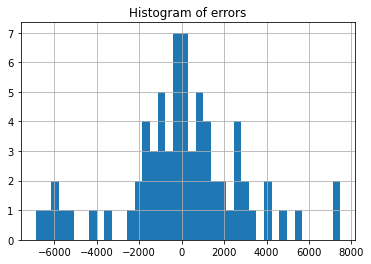

In [15]:
import matplotlib.pyplot as plt

IVs = ['x1', 'x2', 'x3', 'x4', 'x5', 'train']

# create train / test split using dataframe
x_train, x_test, y_train, y_test = train_test_split(df2.loc[:, IVs], df2.loc[:, 'y'], test_size=0.25, random_state=13)

# try both linear and polynomial of different degrees
linear_model = LinearRegression(normalize=True)

# now do estimation of models
lin_1 = linear_model.fit(x_train, y_train)

# ok, check first ten observations of predictions, y_test, and errors to make sure nothing is wrong
print (lin1_predict[0:10])
print (y_test[0:10])

# this creates errors of y and y'
errors = (y_test - lin1_predict)
print()
print()
print (errors[0:10])

# do histogram -- choose reasonable bins parameter
errors.hist(bins = 40)
plt.title('Histogram of errors')


In [16]:
# just check that things make sense
print (len(lin_1.coef_))
print (len(p2_1.coef_))
print (len(p3_1.coef_))
print (lin_1.coef_)
print (lin_1.intercept_)
print (x_train.columns)


6
28
84
[ 2.26543993e-01  2.14106972e+00 -1.60168075e+00  5.35842002e+02
  9.24458847e+00  1.31214703e+03]
-1357.6015496445957
Index(['x1', 'x2', 'x3', 'x4', 'x5', 'train'], dtype='object')


In [17]:

# one can do this w/ cross_val_score or kfold -- but this is easier
from sklearn.model_selection import cross_val_score

print(cross_val_score(linear_model, df2.loc[:, IVs], df2.loc[:, 'y'], cv=5))



[ 0.06987295  0.28748138  0.39542206  0.12630302 -1.68951675]


d:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardSca

In [18]:
# find RMSE; y_true first then y_model
print ("linear train / test rmse: ", mean_squared_error(y_train, lin_1.predict(x_train))**(.5), " / ", mean_squared_error(y_test, lin1_predict)**(.5))
print ("poly degree 2 train / test rmse: ", mean_squared_error(y_train, p2_1.predict(p2_train))**(.5), " / ", mean_squared_error(y_test, p2_predict)**(.5))
print ("poly degree 3 train / test rmse: ", mean_squared_error(y_train, p3_1.predict(p3_train))**(.5), " / ", mean_squared_error(y_test, p3_predict)**(.5))

# also do R^2
print ("linear train / test r^2: ", r2_score(y_train, lin_1.predict(x_train)), " / ", r2_score(y_test, lin1_predict))
print ("poly degree 2 train / test r^2: ", r2_score(y_train, p2_1.predict(p2_train)), " / ", r2_score(y_test, p2_predict))
print ("poly degree 3 train / test r^2: ", r2_score(y_train, p3_1.predict(p3_train)), " / ", r2_score(y_test, p3_predict))

linear train / test rmse:  2298.746229122847  /  2842.784144434322
poly degree 2 train / test rmse:  21.2353811444265  /  22.799218541319483
poly degree 3 train / test rmse:  30.320391106428126  /  27.775995388393422
linear train / test r^2:  0.3623870678691343  /  -0.2695167351041512
poly degree 2 train / test r^2:  0.9999455879387902  /  0.999918343533242
poly degree 3 train / test r^2:  0.9998890711130719  /  0.9998788035430168


In [19]:
# now, look for large magnitude IVs -- note trick with get_features_names() to have columns from original data
for i in range(0, len(IVs)):
    print (IVs[i], ", ", (lin_1.coef_)[i])

x1 ,  0.22654399306233278
x2 ,  2.1410697239152188
x3 ,  -1.6016807496811634
x4 ,  535.8420018238361
x5 ,  9.244588468595683
train ,  1312.1470328481394


In [20]:
# now, look for large magnitude IVs -- note trick with get_features_names() to have columns from original data
for i in range(0, len(p2_features.get_feature_names())):
    print (p2_features.get_feature_names(x_train.columns)[i], ", ", (p2_1.coef_)[i])

1 ,  -1.400066191510925e-11
x1 ,  0.9990159408903392
x2 ,  -0.0176552722370562
x3 ,  -1.4997571089519146
x4 ,  -3.8921598775688224
x5 ,  2.5353876196125174
train ,  641.9357014595862
x1^2 ,  0.00019434944005156639
x1 x2 ,  -3.5708474397449985e-06
x1 x3 ,  -2.6412030957320793e-05
x1 x4 ,  -0.03139054607015939
x1 x5 ,  -0.0005597358173919782
x1 train ,  0.999298554367172
x2^2 ,  0.00015134154531235697
x2 x3 ,  -2.3643855645267625e-06
x2 x4 ,  -0.02216835495524341
x2 x5 ,  -3.1087222235051395e-05
x2 train ,  0.018478164064383233
x3^2 ,  3.119867368456216e-07
x3 x4 ,  5.005309355447011
x3 x5 ,  2.7047464322075977e-05
x3 train ,  -1.5009175176387812
x4^2 ,  -3.892159877572831
x4 x5 ,  -0.1768625715391635
x4 train ,  -3.892159877572831
x5^2 ,  -0.00016486348992519716
x5 train ,  2.5082780372759106
train^2 ,  641.9357014596242


d:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
# now, look for large magnitude IVs -- note trick with get_features_names() to have columns from original data
for i in range(0, len(p3_features.get_feature_names())):
    print (p3_features.get_feature_names(x_train.columns)[i], ", ", (p3_1.coef_)[i])

1 ,  -1.3249003091373216e+16
x1 ,  292275900886.7837
x2 ,  435959010305.54913
x3 ,  -66883284731.55029
x4 ,  137877821709009.92
x5 ,  2287526120917.777
train ,  -1269676207300899.5
x1^2 ,  -10047876.041157441
x1 x2 ,  -1281289154.2365384
x1 x3 ,  -249449182.31739306
x1 x4 ,  -4267170472544.518
x1 x5 ,  -23428198353.391876
x1 train ,  35652621529.97898
x2^2 ,  -2725965347.446393
x2 x3 ,  290360139.25872046
x2 x4 ,  -4453134380570.4
x2 x5 ,  -4326425820.040369
x2 train ,  798910954178.8064
x3^2 ,  37442796.28765829
x3 x4 ,  30721399124.44026
x3 x5 ,  -145247846.0763601
x3 train ,  49593712801.036995
x4^2 ,  -34108663297040.57
x4 x5 ,  3943386819454.6265
x4 train ,  -121320264516040.81
x5^2 ,  6376966453.080841
x5 train ,  -1515948823227.4548
train^2 ,  882000029913345.1
x1^3 ,  -4.5655628293913977e-08
x1^2 x2 ,  -1.1580908048668358e-06
x1^2 x3 ,  -7.62886909425891e-08
x1^2 x4 ,  -0.00048619901318013833
x1^2 x5 ,  -2.0169893278243353e-05
x1^2 train ,  10047876.040875794
x1 x2^2 ,  -3.0761

In [ ]:
# add writeup here on what variables matter / what your final model is for Y ~ f(x)